**BSP 2025-2026/1**

**Total of 20 marks**

**Name/Neptun Code:**

**Marks attained for this part of the homework will count towards your final grade.**

**To attain (full) marks for a question, any answer that includes images or a piece of knowledge, which should be referenced/cited, needs to highlight the source (book, article or web address). You are encouraged to help each other, but identical solutions will not be graded.**

**Write your codes to this document for the full marks. Rename the document to: BSP25_01_TEAM_MONOGRAM**

# Task 1 – Biomedical Device/Application Analysis

(7 points)

Select a biomedical device or application (smartphone app, wearable device, or portable sensor) that measures a physiological signal. You can also choose your own topic.
Possible signals: ECG, PPG, fPCG, SpO₂, blood pressure, body temperature, respiratory rate, physical activity, sleep

Your presentation should cover:
- The physiological signal measured and the principle of measurement
- Whether additional hardware is required, and whether the measurement is real-time
- How the technology has evolved over the past 10 years (2015–2025), illustrated with a diagram of publication numbers from PubMed and Scopus, including the exact search terms and sources used
- The main future potential and possible applications
- The current major barriers or challenges
- A short demonstration: if feasible, show your own trial, a case example, or a publicly available sample measurement

5-minute presentation – upload your slides before the start of the lab session (BSP25_01_TEAM.pptx).


## Implementation
Presentation in separate file

# Task 2 – Biomedical Signal Exploration

(9 points)

2.1 Signal Selection
- Pick any three biomedical signals (e.g., ECG, PPG, EMG, SpO₂, respiration) from publicly available databases (PhysioNet or others).
- Export them as .mat files and save the associated info/metadata files.

2.2 Signal Loading
- Load the .mat files into Python (PyCharm).
- Inspect the info files and describe the recorded parameters (signal length, sampling rate, units, patient info if available).

2.3 Basic Visualization
- Explain the concepts of base and gain of a signal and how they appear in the measurement.
- Create a parser function for the info files to extract signal length, sampling rate, name, base, gain, and unit.
- Create a plotting function to visualize the signals. Plot each signal in a separate figure with proper axis labels.
- Discuss what you observe in the waveform (e.g., general shape, fluctuations, amplitude differences).

2.4 Frequency Overview
- Explain in your own words what the Fourier Transform (FFT) does.
- Compute and plot the FFT of one signal to show the frequency content.

## Resources
- PhysioNet main page: https://physionet.org/
- PhysioBank ATM: https://archive.physionet.org/cgi-bin/atm/ATM

## Implementation

### 2.1

Since the given PhysioBank ATM site was not awailable at the time we chose our dataset we chose another from PhysioNet. Finally we chose the dataset "Wearable Device Dataset from Induced Stress and Structured Exercise Sessions" located at ```https://physionet.org/content/wearable-device-dataset/1.0.1/```
The dataset is not in a ```.mat``` file but in multiple ```.csv``` but we talked about it with the Teacher and He said it is okay.

### 2.2

#### Setup paths and imports

In [1]:
import pandas as pd
import os
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
#replace the folder path with your own path
base_path = "Data/wearable-device-dataset-from-induced-stress-and-structured-exercise-sessions-1.0.1" 

dataset_path=os.path.join(base_path, 'Wearable_Dataset')

#### Data Dictionary

It explains the signal types. 

Columns used:
- Code - short code used for the signal
- Variable Name - full name of the measurement
- Description - short description of the signal
- Sampling Frequency (Hz) - the number of measurements per second
- Units - unit of the measurement

In [3]:
data_dict = pd.read_csv(os.path.join(base_path, 'Data_Dictionary.csv'), encoding="ISO-8859-1")
data_dict

,Code,Variable Name,Description,Sampling Frequency (Hz),Units
0,EDA,Electrodermal Activity,Data from the electrodermal activity sensor,4,microsiemens (uS)
1,TEMP,Skin Temperature,Data from temperature sensor,4,Celsius (°C)
2,BVP,Blood Volume Pulse,Data from photoplethysmograph,64,-
3,HR,Heart Rate,Average heart rate extracted from the BVP signal,1,beats per minute (BPM)
4,IBI,Inter Beat Interval,Time between individuals heart beats extracted...,-,-
5,ACC,3-axis Accelerometer,Data from 3-axis accelerometer sensor (x;y;z),32,1/64g
6,tags,Event mark times,Each mark corresponds to a physical button pre...,-,-


#### Subject Info

In [4]:
subject_info = pd.read_csv(os.path.join(base_path, 'subject-info.csv'))
subject_info

,Info,Gender,Age,Height (cm),Weight (kg),Does physical activity regularly?,Protocol,Stress Inducement,Aerobic Exercise,Anaerobic Exercise
0,S01,m,21,192,84,Yes,V1,Yes,Yes,Yes****
1,S02,m,20,185,95,No,V1,Yes****,Yes,Yes
2,S03,m,20,175,62,Yes,V1,Yes,Yes***,Yes
3,S04,m,21,174,70,Yes,V1,Yes,Yes,Yes
4,S05,m,21,173,72,Yes,V1,Yes,Yes,Yes
5,S06,m,21,172,70,Yes,V1,Yes,Yes,Yes***
6,S07,m,19,184,88,Yes,V1,Yes,Yes***,Yes
7,S08,m,20,174,67,Yes,V1,Yes,Yes,Yes
8,S09,m,19,174,63,Yes,V1,Yes,Yes,Yes
9,S10,m,21,180,80,Yes,V1,Yes,Yes,Yes


#### Stress level

In [5]:
strees_level_v1_path=os.path.join(base_path, 'Stress_Level_v1.csv')
strees_level_v2_path=os.path.join(base_path, 'Stress_Level_v2.csv')

In [6]:
stress_level_v1=pd.read_csv(strees_level_v1_path,index_col=0)
stress_level_v2=pd.read_csv(strees_level_v2_path,index_col=0)

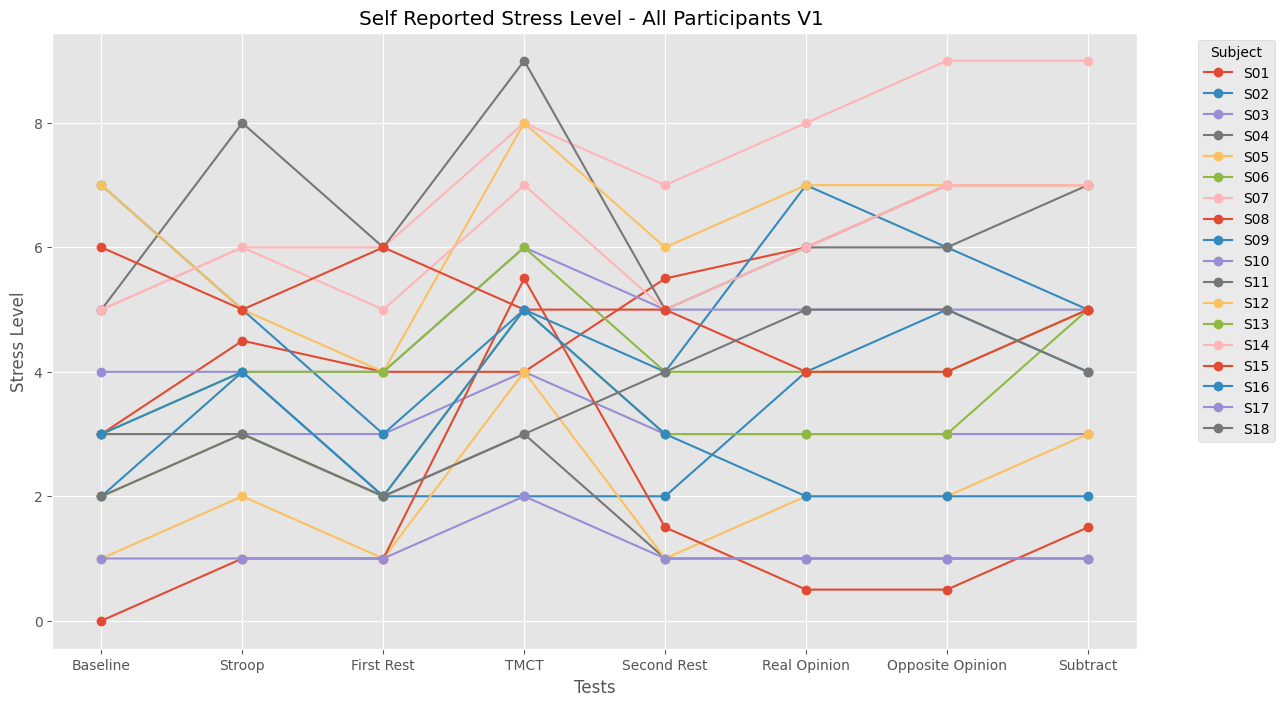

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(14, 8))

for index, row in stress_level_v1.iterrows():
    plt.plot(stress_level_v1.columns, row, marker='o', label=index)

plt.title('Self Reported Stress Level - All Participants V1 ')
plt.xlabel('Tests')
plt.ylabel('Stress Level')
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

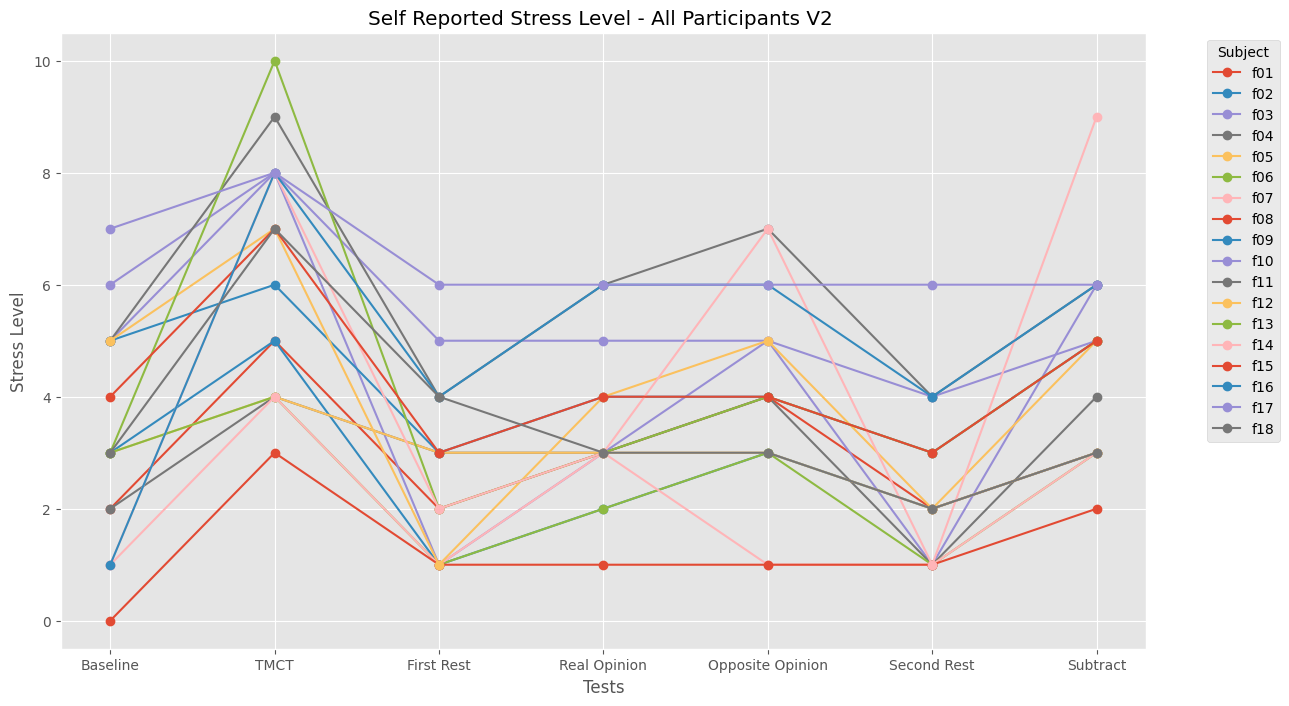

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(14, 8))

for index, row in stress_level_v2.iterrows():
    plt.plot(stress_level_v2.columns, row, marker='o', label=index)

plt.title('Self Reported Stress Level - All Participants V2 ')
plt.xlabel('Tests')
plt.ylabel('Stress Level')
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 2.3

#### Base and gain

Base and gain are a feature of any signal measurement. Base is a constant term in the signal on which the useful signal is superimposed. It can be seen later in the plot of the acceleration signals, where the three different axis signals have a different base.
Gain essentially is the amplitude of the useful signal around the base. Bigger gain means bigger amplitude but usually also bigger noise.

#### Plotting signals

In [9]:
def read_measurement(file_path):
    data = pd.read_csv(file_path)
    return data

In [10]:
def prepare_signal(df, signal_name):
    if 'tags' in signal_name:
        return None
    if 'IBI' in signal_name:
        sampling_rate = None
        df = df.iloc[:, [1]]

    if 'IBI' not in signal_name:
        sampling_rate = int(df.iloc[0, 0])
        # Remove first row, which is the sampling rate
        df = df.iloc[1:]

    return df, sampling_rate

In [11]:
def read_measurements(state, subject):
    measurements = os.listdir(os.path.join(dataset_path, state, subject))
    data = {}
    for measurement in measurements:
        file_path = os.path.join(dataset_path, state, subject, measurement)
        data[measurement] = prepare_signal(read_measurement(file_path), measurement)
    return data

In [12]:
def plot_signal(signal, title, xlabel, ylabel, domain=None):
    plt.figure(figsize=(14, 6))

    if domain is not None:
        plt.plot(domain, signal)
    else:
        plt.plot(signal)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

In [13]:
def create_domain(length, sampling_rate=None):
    if sampling_rate is not None:
        return np.arange(0, length) / sampling_rate
    else:
        return np.arange(0, length)

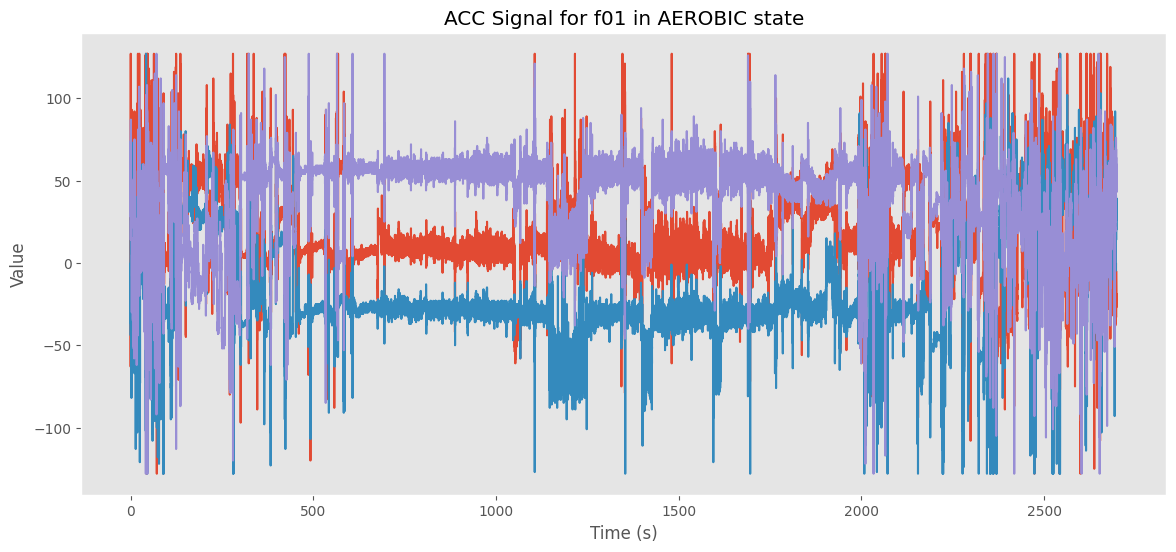

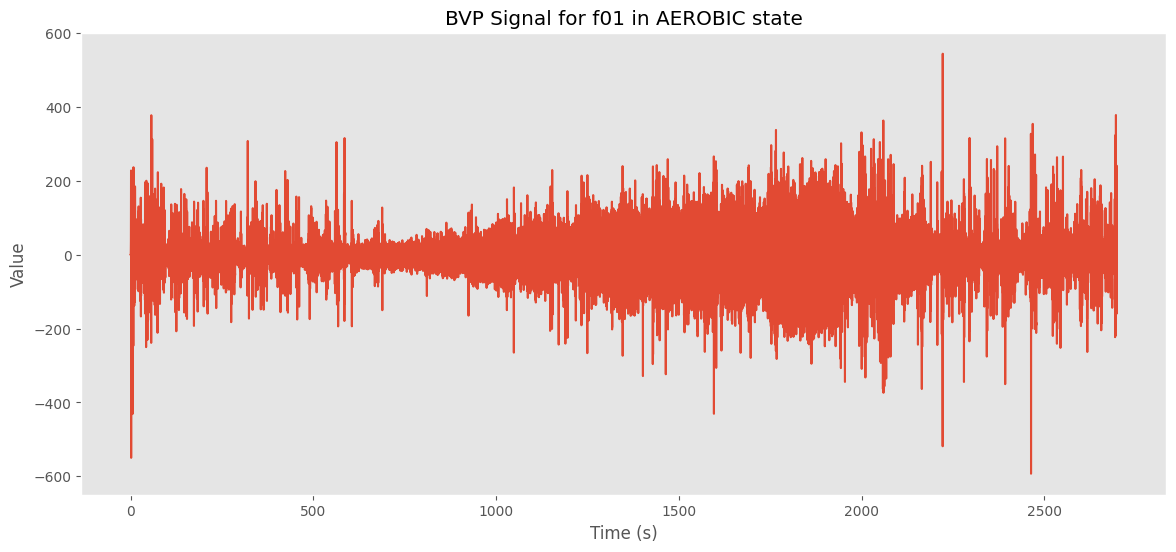

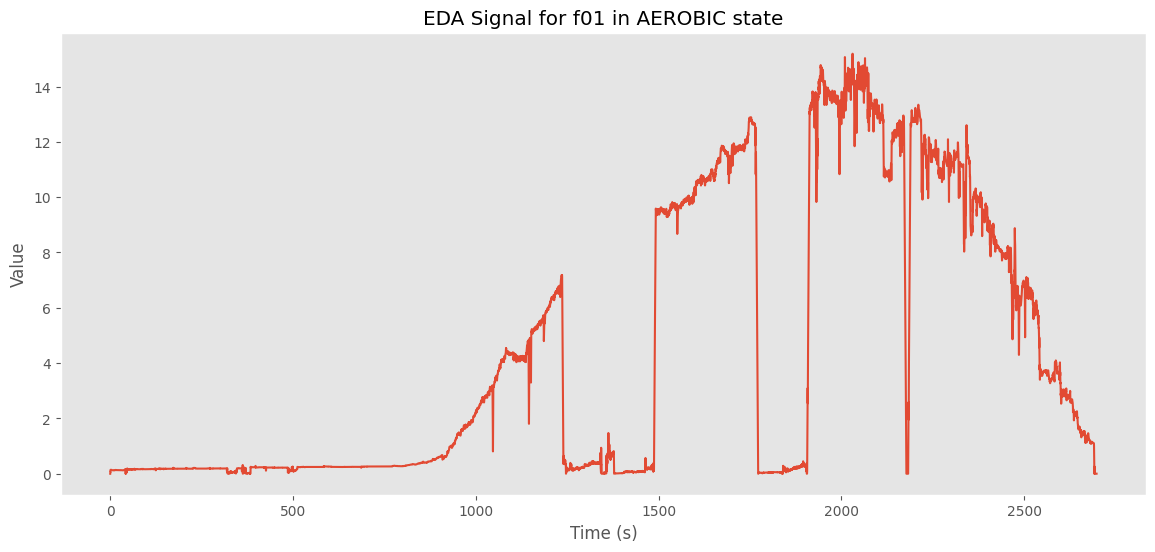

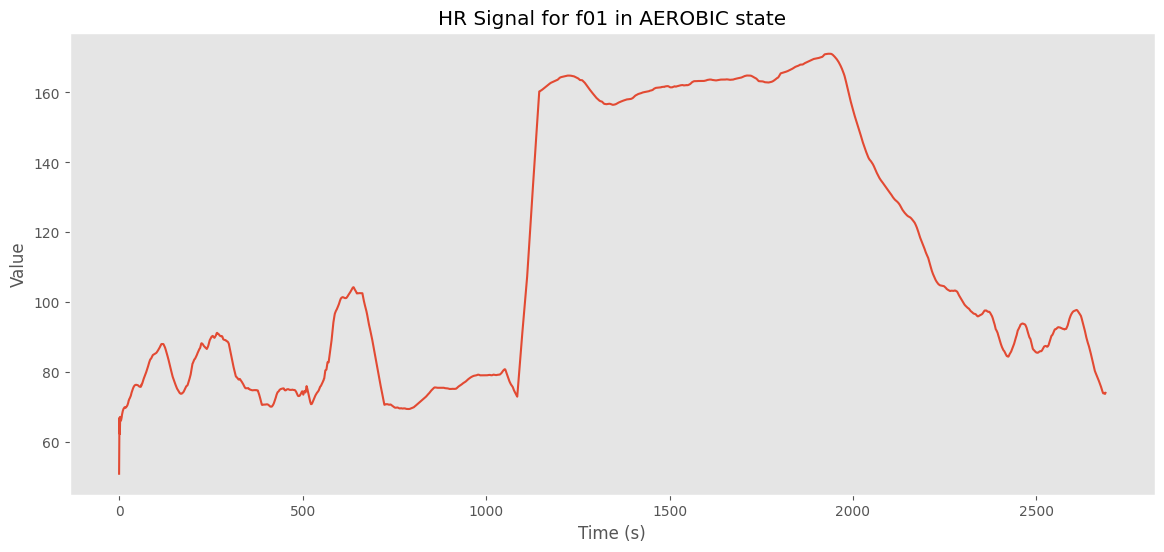

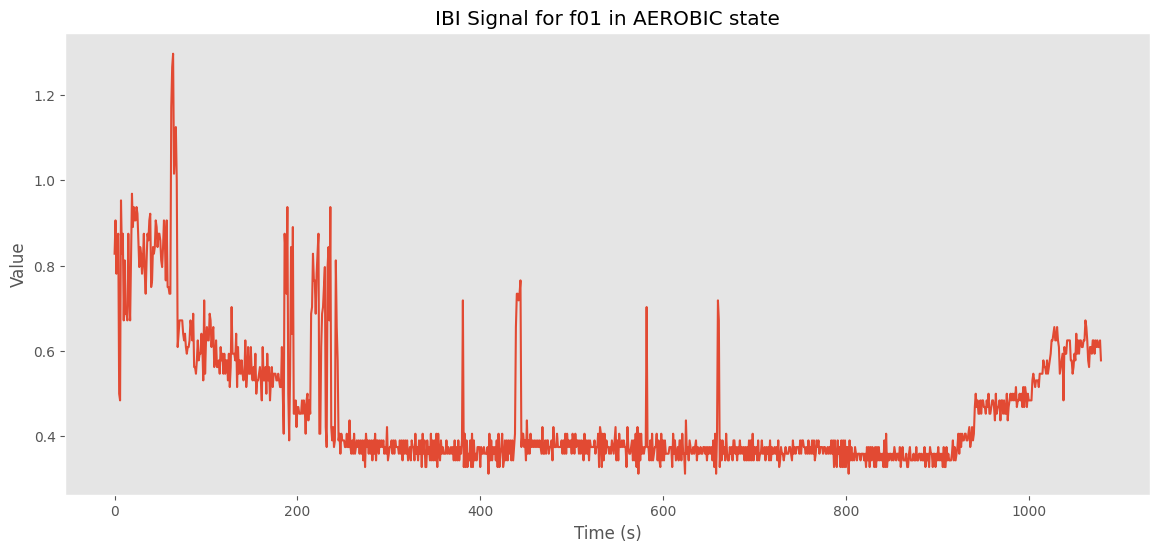

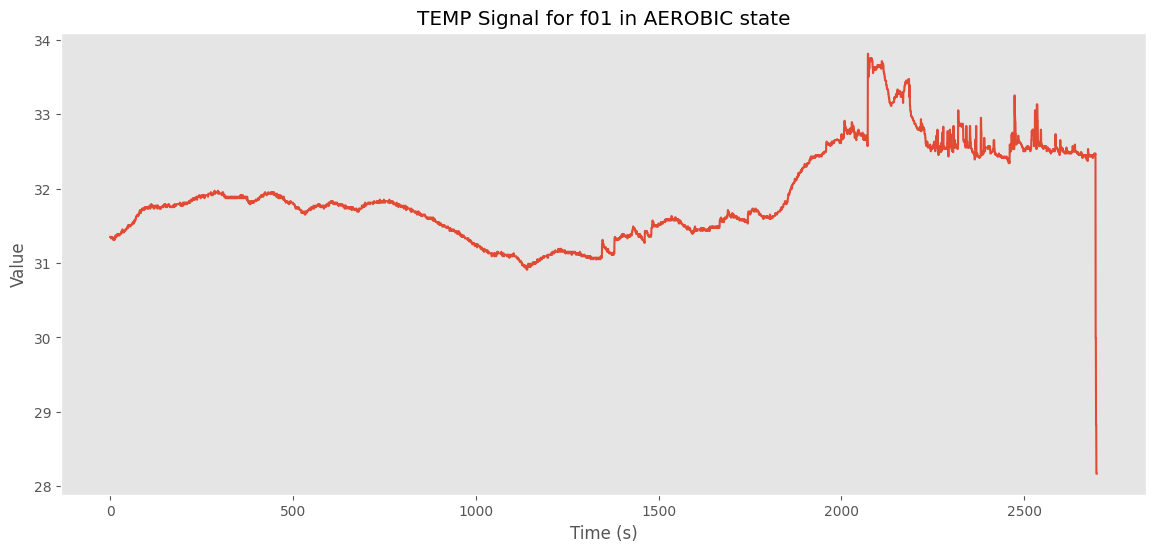

In [14]:
state = os.listdir(dataset_path)[0] # select one state from ['AEROBIC', 'ANAEROBIC', 'STRESS']
subject = os.listdir(os.path.join(dataset_path, state))[0] # select one subject from ['f01', 'f02', ..., 'f13', 'S1', 'S2', ..., 'S18']

data = read_measurements(state, subject)

for measurement, df in data.items():
    if 'tags' in measurement:
        continue
    plot_signal(df[0], f'{measurement.split(".")[0]} Signal for {subject} in {state} state', 'Time (s)', 'Value', create_domain(len(df[0]), df[1]))

In [15]:
def plot_specific_signal(state, subject, measurement_name):
    try:
        data = read_measurements(state, subject)
    except Exception as e:
        print(f"Error reading measurements: {e}")
        return
    for measurement, df in data.items():
        if measurement_name in measurement:
            if 'IBI' in measurement_name:
                df = df.iloc[:, [1]]
            plot_signal(df[0], f'{measurement.split(".")[0]} Signal for {subject} in {state} state', 'Time', 'Value', create_domain(len(df[0]), df[1]))
            return
    print(f'Measurement {measurement_name} not found for subject {subject} in state {state}.')

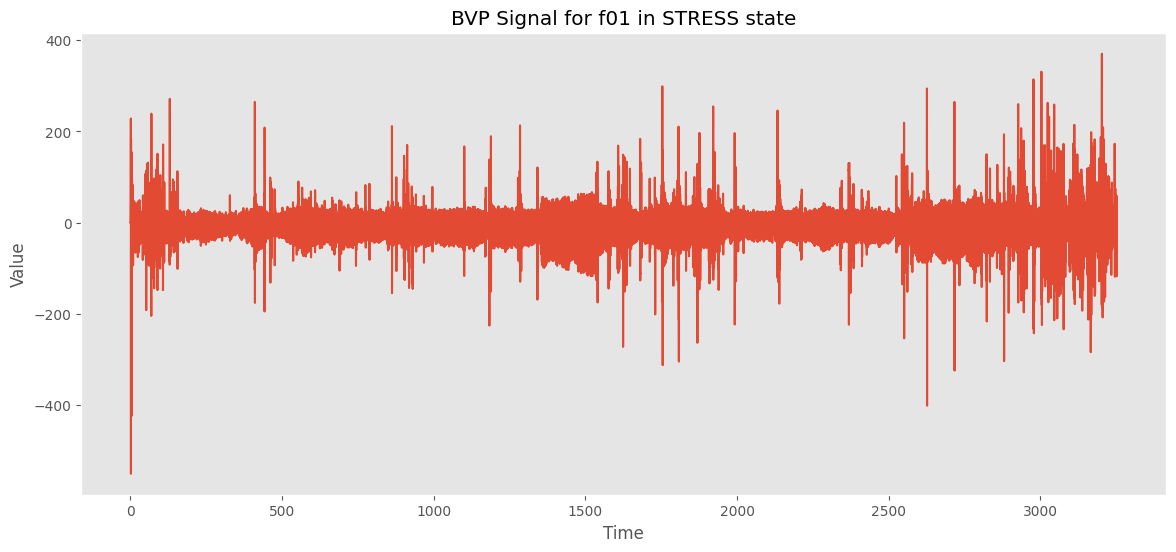

In [16]:
plot_specific_signal('STRESS', 'f01', 'BVP.csv')

### 2.4

Fourier Transform is a function that converts a signal from time domain to frequency domain. The time domain shows how the signal changes as time goes on but the frequency domain shows which frequencies are more or less dominant in the whole signal.

In [17]:
def FFT(signal, sampling_rate=None):
    n = len(signal)
    freq = np.fft.fftfreq(n, d=1/sampling_rate) if sampling_rate is not None else np.fft.fftfreq(n)
    fft_values = np.fft.fft(signal)
    return freq, fft_values

In [18]:
def transform_specific_signal(state, subject, measurement_name):
    try:
        data = read_measurements(state, subject)
    except Exception as e:
        print(f"Error reading measurements: {e}")
        return
    for measurement, df in data.items():
        if measurement_name in measurement:
            # df = df[0]
            # if 'IBI' in measurement_name:
                # df = df.iloc[:, [1]]
            freq, fft_values = FFT(df[0].values.flatten(), df[1])

            return freq, fft_values
    print(f'Measurement {measurement_name} not found for subject {subject} in state {state}.')

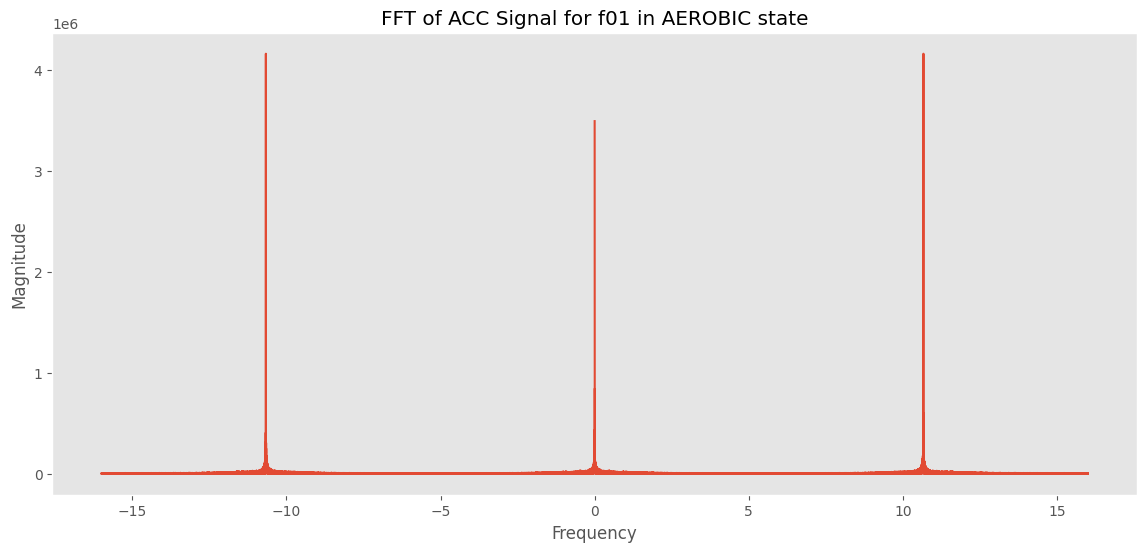

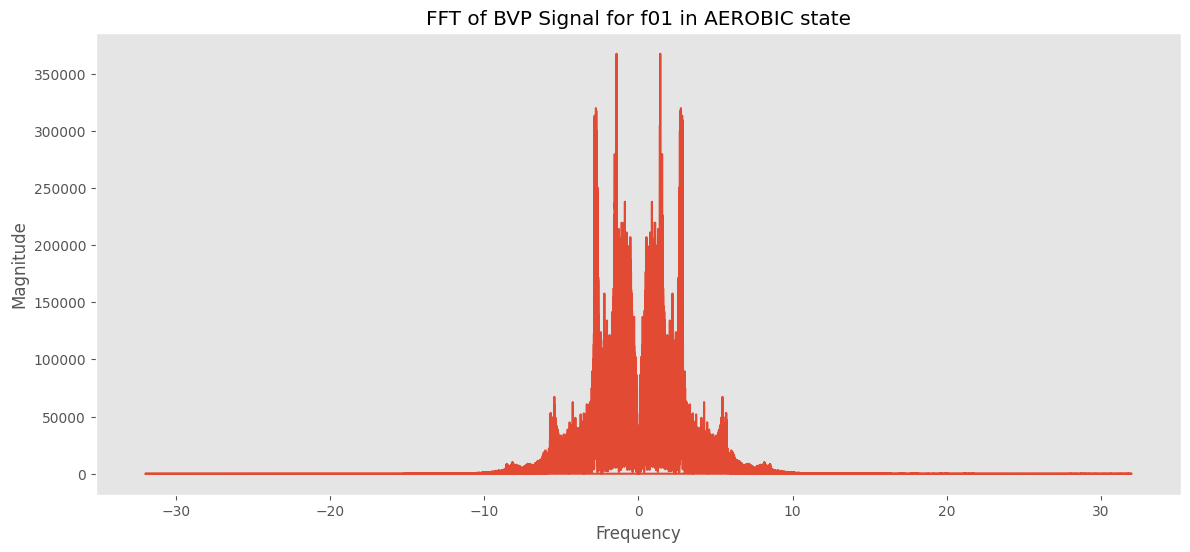

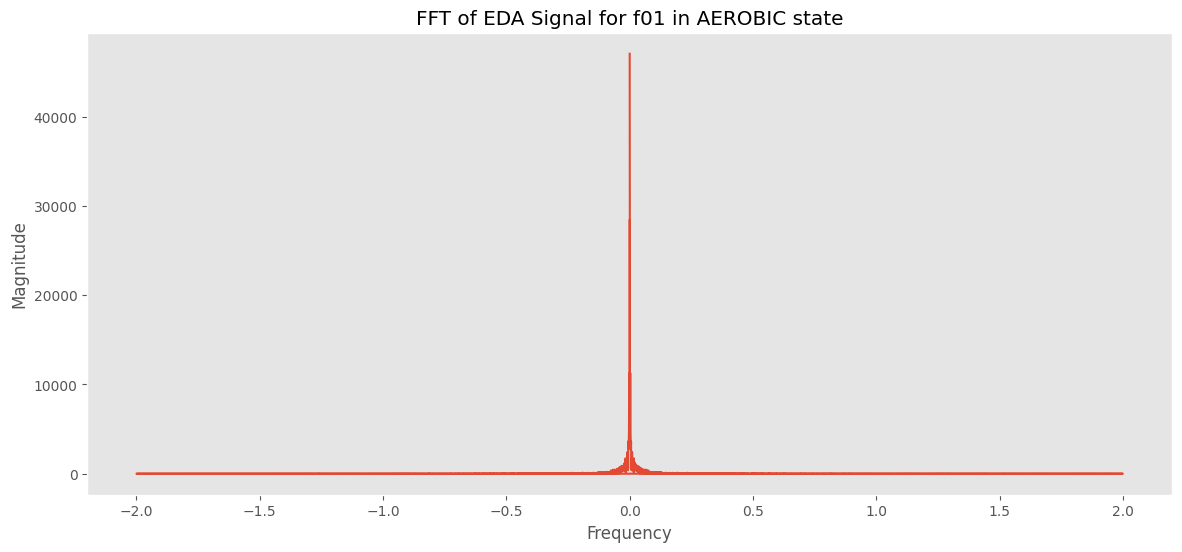

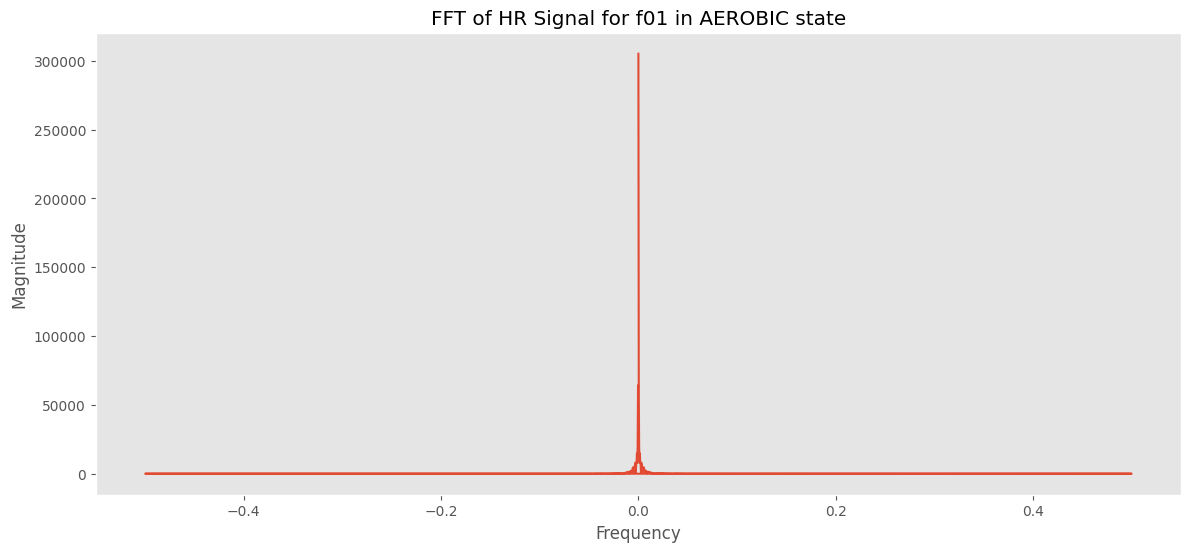

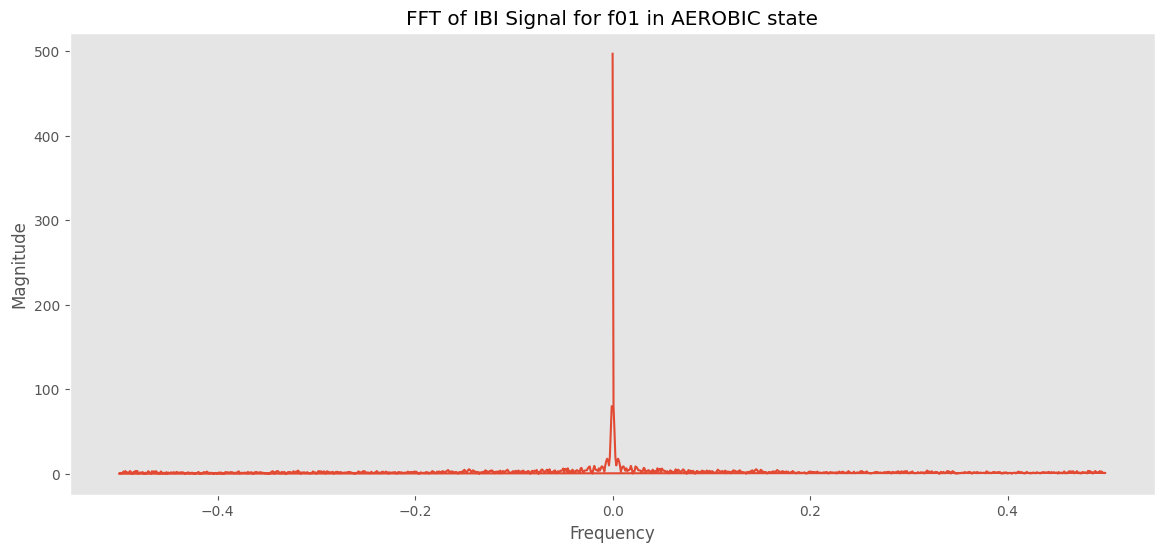

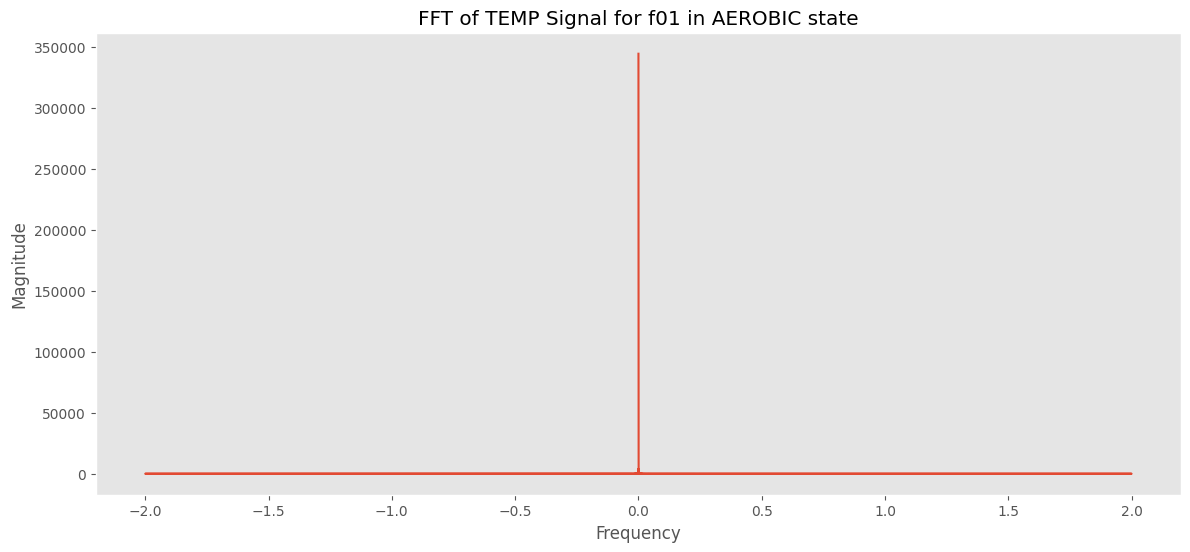

In [19]:
state = os.listdir(dataset_path)[0] # select one state from ['AEROBIC', 'ANAEROBIC', 'STRESS']
subject = os.listdir(os.path.join(dataset_path, state))[0] # select one subject from ['f01', 'f02', ..., 'f13', 'S1', 'S2', ..., 'S18']

data = read_measurements(state, subject)
data_fft = {}

for measurement, df in data.items():
    if 'tags' in measurement:
        continue
    freq, fft_values = transform_specific_signal(state, subject, measurement)
    if freq is not None and fft_values is not None:
        data_fft[measurement] = (freq, fft_values)
        plot_signal(np.abs(fft_values), f'FFT of {measurement.split(".")[0]} Signal for {subject} in {state} state', 'Frequency', 'Magnitude', freq)

# TASK 3 – Physiological Modulation and Signal Variability

(4 points)

Select one biomedical signal (ECG, PPG, EMG, SpO₂, respiration, etc.) from a public database or your own measurements.
- Investigate how normal physiological changes (e.g., breathing, exercise, posture, stress, sleep-wake cycles) influence the signal.
- Explain the underlying physiological mechanism for the changes you observe.
- Show visual examples of the signal under different conditions (time-domain plots; optionally frequency-domain plots).
- Discuss how this variability affects interpretation and why it is important in biomedical monitoring.

## Electrodermal Activity (EDA)

This signal gets bigger if we exercise, since it measures skin conductance wich get bigger with exercise because of surface sweat rich in electrolites.

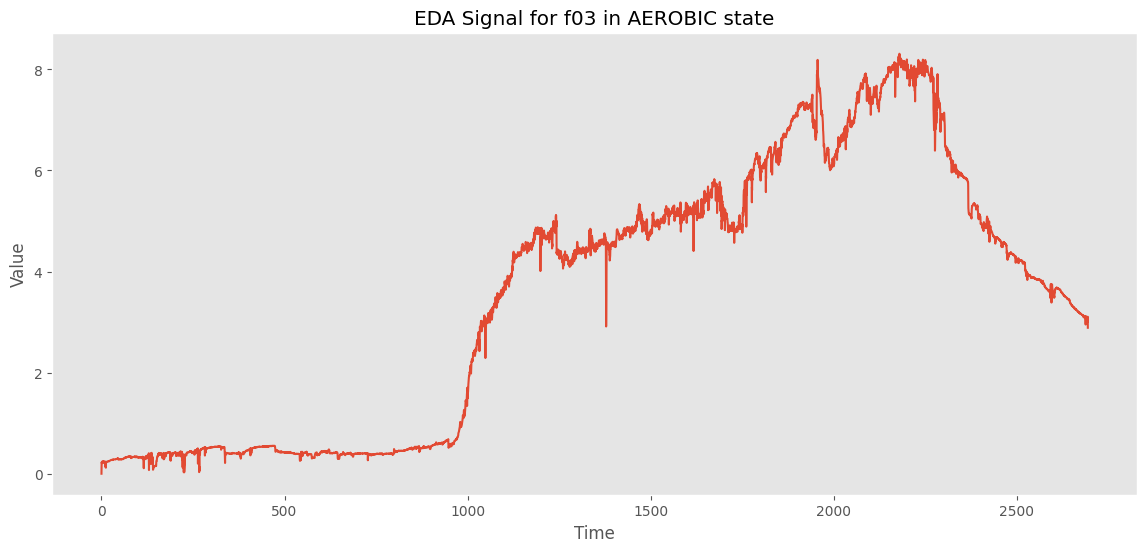

In [20]:
plot_specific_signal('AEROBIC', 'f03', 'EDA.csv')

We can clearly see that the subject started intese exercise right before 1000 seconds. After that the measured EDA signal gets significantly higher.